# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Historical_Market_Data_Clean.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
print(X)

[[1.703e+01 2.000e-02]
 [1.487e+01 2.000e-02]
 [1.630e+01 3.000e-02]
 [2.070e+01 4.000e-02]
 [7.091e+01 3.000e-02]
 [2.146e+01 4.000e-02]
 [1.736e+01 5.000e-02]
 [1.807e+01 4.000e-02]
 [1.999e+01 4.000e-02]
 [2.273e+01 4.000e-02]
 [3.143e+01 4.000e-02]
 [4.617e+01 5.000e-02]
 [2.755e+01 5.000e-02]
 [2.904e+01 7.000e-02]
 [3.292e+01 5.000e-02]
 [2.429e+01 6.000e-02]
 [1.953e+01 7.000e-02]
 [1.808e+01 6.000e-02]
 [1.489e+01 8.000e-02]
 [2.134e+01 6.000e-02]
 [2.250e+01 7.000e-02]
 [2.593e+01 7.000e-02]
 [1.535e+01 8.000e-02]
 [1.513e+01 8.000e-02]
 [1.182e+01 9.000e-02]
 [1.402e+01 9.000e-02]
 [1.801e+01 7.000e-02]
 [1.428e+01 9.000e-02]
 [1.036e+01 1.100e-01]
 [1.152e+01 1.200e-01]
 [1.148e+01 1.000e-01]
 [7.730e+00 1.500e-01]
 [9.020e+00 1.300e-01]
 [7.390e+00 1.100e-01]
 [7.880e+00 9.000e-02]
 [8.280e+00 8.000e-02]
 [1.041e+01 7.000e-02]
 [1.182e+01 8.000e-02]
 [8.300e+00 8.000e-02]
 [1.168e+01 7.000e-02]
 [1.809e+01 6.000e-02]
 [1.801e+01 6.000e-02]
 [1.812e+01 6.000e-02]
 [1.576e+01

In [4]:
print(y)

[3.27 4.63 3.67 3.57 3.43 2.26 1.96 2.02 2.09 2.04 1.99 1.33 1.15 0.91
 0.87 1.78 2.24 2.38 3.13 2.86 2.44 3.38 5.   5.33 5.8  5.26 4.15 4.
 3.83 4.02 4.48 5.06 3.69 5.04 4.53 4.14 3.65 3.81 3.97 2.75 1.91 1.87
 2.25 1.77 1.36 1.42 1.9  1.38 1.13 1.79 2.58 1.98 2.2  2.12 2.59 3.35
 2.41 2.86 3.34 4.38 3.53 4.58 4.47 5.87 6.22 4.58 5.43 4.68 4.86 3.81
 4.84 4.92 3.51 2.4  2.02 2.51 1.54 2.24 2.43 2.   2.44 1.86 1.2  0.99
 0.91 1.   2.12 1.77]


In [14]:
# Check correlations of data
df = pd.DataFrame(X,y)
correlation_matrix = df.corr()
print (correlation_matrix)

          0         1
0  1.000000 -0.122611
1 -0.122611  1.000000


## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [7]:
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)

Coefficients: [-0.0522432   7.12755991]
Intercept: 3.5294387259664037



## Predicting the Test Set Results

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2.89 3.67]
 [2.51 0.91]
 [2.99 2.12]
 [3.02 1.87]
 [2.97 5.43]
 [3.64 4.48]
 [3.03 1.42]
 [3.28 1.77]
 [2.81 2.24]
 [3.29 1.77]
 [2.87 2.02]
 [3.09 4.15]
 [3.93 5.04]
 [3.29 5.87]
 [2.77 2.09]
 [3.01 2.24]
 [3.55 5.8 ]
 [3.05 2.41]]


## Evaluating the Model Performance

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate the performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R-squared: {r2:.3f}')
print(f'Mean Absolute Error: {mae:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')

R-squared: 0.211
Mean Absolute Error: 1.268
Mean Squared Error: 1.984
Root Mean Squared Error: 1.409


## Stats Table for Training Data

In [11]:
import statsmodels.api as sm

# After training the multiple linear regression model...

# Add a constant to the input features
X_train = sm.add_constant(X_train)

# Fit a regression model using OLS (ordinary least squares)
regressor = sm.OLS(y_train, X_train).fit()

# Print the p-value table
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     7.147
Date:                Sat, 22 Apr 2023   Prob (F-statistic):            0.00154
Time:                        17:36:55   Log-Likelihood:                -111.48
No. Observations:                  70   AIC:                             229.0
Df Residuals:                      67   BIC:                             235.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5294      0.415      8.507      0.0

# Plot Residuals of Training Data

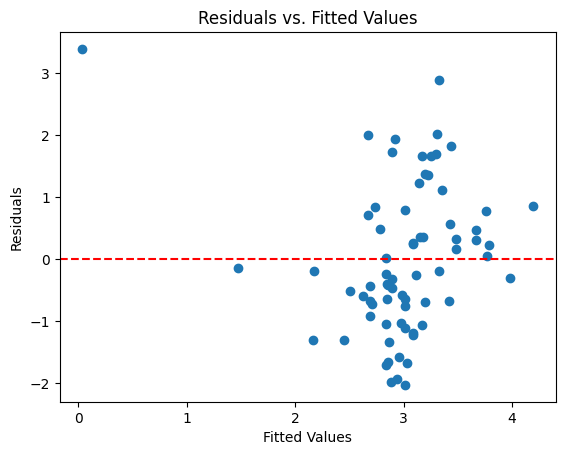

In [15]:
y_train_pred = regressor.predict(X_train)
residuals_train = y_train - y_train_pred
plt.scatter(y_train_pred, residuals_train)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values of Training Data')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Plot Residuals of Test Data

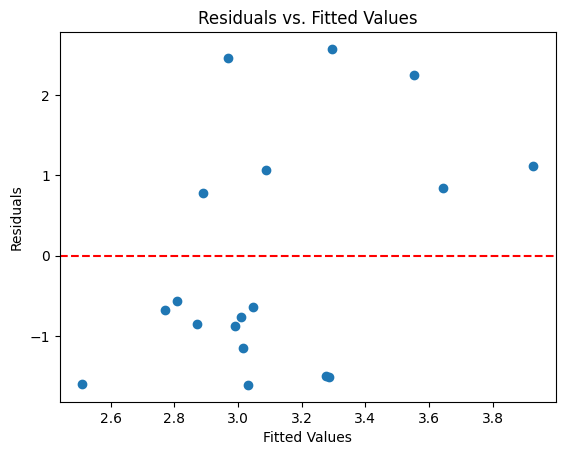

In [17]:
residuals_test = y_test - y_pred
plt.scatter(y_pred, residuals_test)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values of Test Data')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

##Further Model Evaluation

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Add a constant to the test input features
X_test = sm.add_constant(X_test)

# Predict the test data
y_pred = regressor.predict(X_test)

# Calculate the performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R-squared: {r2:.3f}')
print(f'Mean Absolute Error: {mae:.3f}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'Root Mean Squared Error: {rmse:.3f}')